In [52]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches

import pandas as pd
import scipy.stats as stats

np.set_printoptions(threshold=np.inf)

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

In [53]:
def file_import(file_path, sheet_names):
    file_name = pd.read_excel(file_path, sheet_name = sheet_names)
    return file_name

def pearsonr_1D(x, y):
    if (x.size != y.size):
        return None
    
    xm = x - np.mean(x)
    ym = y - np.mean(y)
    upper = np.sum(xm * ym)
    lower = np.sqrt(np.sum(np.power(xm, 2)) * np.sum(np.power(ym, 2)))
    
    if (lower == 0):
        return None
    
    rho = upper / lower
    return rho

In [54]:
# Import Data
p16_FBS_pred = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_FBS_p16_prediction.xlsx", ["P2", "P4", "P6", "P8", "P10"])
p16_FBS_target = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_FBS_p16_target.xlsx", ["P2", "P4", "P6", "P8", "P10"])

# Import Backgrounds
p16_FBS_pred_background = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_FBS_p16_prediction.xlsx", ["P2_Background", "P4_Background", "P6_Background", "P8_Background", "P10_Background"])
p16_FBS_target_background = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_FBS_p16_prediction.xlsx", ["P2_Background", "P4_Background", "P6_Background", "P8_Background", "P10_Background"])

# Standardize Data to Background and P2
for pred, background in zip(p16_FBS_pred, p16_FBS_pred_background):
    p16_FBS_pred[pred].Mean = p16_FBS_pred[pred].Mean - np.mean (p16_FBS_pred_background[background].Mean)

for target, background in zip(p16_FBS_target, p16_FBS_target_background):
    p16_FBS_target[target].Mean = p16_FBS_target[target].Mean - np.mean (p16_FBS_target_background[background].Mean)

# Concatenate Data
p16_FBS_pred = pd.concat(p16_FBS_pred, ignore_index=True)
p16_FBS_target = pd.concat(p16_FBS_target, ignore_index=True)

# Split Data
p16_FBS_pred_array = np.array_split(np.array(p16_FBS_pred.Mean),15)
p16_FBS_target_array = np.array_split(np.array(p16_FBS_target.Mean),15)

# Pearson Correlation Coefficient
p16_FBS_pearsonr_values = []
for pred, target in zip(p16_FBS_pred_array, p16_FBS_target_array):
    p16_FBS_pearsonr_values.append(pearsonr_1D(pred,target))
    
print(p16_FBS_pearsonr_values)

[-0.009928878462189804, 0.23783160386981747, -0.1774461533960488, 0.635494232727411, 0.1898677924265208, 0.595870035961419, 0.7691172199543337, 0.11497465482342084, -0.11268454383212612, 0.6216420584590618, 0.6168606619550112, 0.3193437988509363, 0.5462278635685517, -0.1267993961085228, 0.2680839683982174]


In [55]:
# Import Data
p16_stemfit_pred = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_stemfit_p16_prediction.xlsx", ["P2", "P4", "P6", "P8", "P10"])
p16_stemfit_target = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_stemfit_p16_target.xlsx", ["P2", "P4", "P6", "P8", "P10"])

# Import Backgrounds
p16_stemfit_pred_background = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_stemfit_p16_prediction.xlsx", ["P2_Background", "P4_Background", "P6_Background", "P8_Background", "P10_Background"])
p16_stemfit_target_background = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_stemfit_p16_prediction.xlsx", ["P2_Background", "P4_Background", "P6_Background", "P8_Background", "P10_Background"])

# Standardize Data to Background and P2
for pred, background in zip(p16_stemfit_pred, p16_stemfit_pred_background):
    p16_stemfit_pred[pred].Mean = p16_stemfit_pred[pred].Mean - np.mean (p16_stemfit_pred_background[background].Mean)

for target, background in zip(p16_stemfit_target, p16_stemfit_target_background):
    p16_stemfit_target[target].Mean = p16_stemfit_target[target].Mean - np.mean (p16_stemfit_target_background[background].Mean)

# Concatenate Data
p16_stemfit_pred = pd.concat(p16_stemfit_pred, ignore_index=True)
p16_stemfit_target = pd.concat(p16_stemfit_target, ignore_index=True)

# Split Data
p16_stemfit_pred_array = np.array_split(np.array(p16_stemfit_pred.Mean),15)
p16_stemfit_target_array = np.array_split(np.array(p16_stemfit_target.Mean),15)

# Pearson Correlation Coefficient
p16_stemfit_pearsonr_values = []
for pred, target in zip(p16_stemfit_pred_array, p16_stemfit_target_array):
    p16_stemfit_pearsonr_values.append(pearsonr_1D(pred,target))
        
print(p16_stemfit_pearsonr_values)

[0.36498290603366357, 0.7892583869876694, 0.23871504143213435, 0.8319397667832531, 0.8447884135672266, 0.9368352297819619, 0.6244008229945959, 0.6127854986661745, 0.8283151580808609, 0.6682570853314233, 0.7971472817734613, 0.7804114746775883, 0.9381338362729988, 0.4758134500934997, 0.7690539924265947]


In [56]:
# Import Data
cd105_FBS_pred = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_FBS_cd105_prediction.xlsx", ["P2", "P4", "P6", "P8", "P10"])
cd105_FBS_target = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_FBS_cd105_target.xlsx", ["P2", "P4", "P6", "P8", "P10"])

# Import Backgrounds
cd105_FBS_pred_background = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_FBS_cd105_prediction.xlsx", ["P2_Background", "P4_Background", "P6_Background", "P8_Background", "P10_Background"])
cd105_FBS_target_background = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_FBS_cd105_prediction.xlsx", ["P2_Background", "P4_Background", "P6_Background", "P8_Background", "P10_Background"])

# Standardize Data to Background and P2
for pred, background in zip(cd105_FBS_pred, cd105_FBS_pred_background):
    cd105_FBS_pred[pred].Mean = cd105_FBS_pred[pred].Mean - np.mean (cd105_FBS_pred_background[background].Mean)

for target, background in zip(cd105_FBS_target, cd105_FBS_target_background):
    cd105_FBS_target[target].Mean = cd105_FBS_target[target].Mean - np.mean (cd105_FBS_target_background[background].Mean)

# Concatenate Data
cd105_FBS_pred = pd.concat(cd105_FBS_pred, ignore_index=True)
cd105_FBS_target = pd.concat(cd105_FBS_target, ignore_index=True)

# Split Data
cd105_FBS_pred_array = np.array_split(np.array(cd105_FBS_pred.Mean),15)
cd105_FBS_target_array = np.array_split(np.array(cd105_FBS_target.Mean),15)

# Pearson Correlation Coefficient
cd105_FBS_pearsonr_values = []
for pred, target in zip(cd105_FBS_pred_array, cd105_FBS_target_array):
    cd105_FBS_pearsonr_values.append(pearsonr_1D(pred,target))
    
print(cd105_FBS_pearsonr_values)

[0.9370771133450932, 0.5133685612755825, 0.9888830608097334, 0.9522371954296466, 0.9908178392959408, 0.9868535682026692, 0.9972431097388631, 0.9840246645648504, 0.930567593091931, 0.8654808258004371, 0.9623733527930167, 0.8225810778321085, 0.980738731501156, 0.9933758489123551, 0.9187381228636162]


In [57]:
# Import Data
cd105_stemfit_pred = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_stemfit_cd105_prediction.xlsx", ["P2", "P4", "P6", "P8", "P10"])
cd105_stemfit_target = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_stemfit_cd105_target.xlsx", ["P2", "P4", "P6", "P8", "P10"])

# Import Backgrounds
cd105_stemfit_pred_background = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_stemfit_cd105_prediction.xlsx", ["P2_Background", "P4_Background", "P6_Background", "P8_Background", "P10_Background"])
cd105_stemfit_target_background = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_stemfit_cd105_prediction.xlsx", ["P2_Background", "P4_Background", "P6_Background", "P8_Background", "P10_Background"])

# Standardize Data to Background and P2
for pred, background in zip(cd105_stemfit_pred, cd105_stemfit_pred_background):
    cd105_stemfit_pred[pred].Mean = cd105_stemfit_pred[pred].Mean - np.mean (cd105_stemfit_pred_background[background].Mean)

for target, background in zip(cd105_stemfit_target, cd105_stemfit_target_background):
    cd105_stemfit_target[target].Mean = cd105_stemfit_target[target].Mean - np.mean (cd105_stemfit_target_background[background].Mean)

# Concatenate Data
cd105_stemfit_pred = pd.concat(cd105_stemfit_pred, ignore_index=True)
cd105_stemfit_target = pd.concat(cd105_stemfit_target, ignore_index=True)

# Split Data
cd105_stemfit_pred_array = np.array_split(np.array(cd105_stemfit_pred.Mean),15)
cd105_stemfit_target_array = np.array_split(np.array(cd105_stemfit_target.Mean),15)

# Pearson Correlation Coefficient
cd105_stemfit_pearsonr_values = []
for pred, target in zip(cd105_stemfit_pred_array, cd105_stemfit_target_array):
    cd105_stemfit_pearsonr_values.append(pearsonr_1D(pred,target))
        
print(cd105_stemfit_pearsonr_values)

[0.7602870180822279, 0.9818341999877364, 0.7938492872313729, 0.9932350473555845, 0.9617511851966515, 0.9509238102397044, 0.9160886090429539, 0.9807024295865445, 0.9876500705019479, 0.986428037050419, 0.9698365817633178, 0.9951239194209077, 0.9905971993955413, 0.9601709418609998, 0.6192056081240843]


In [58]:
# Import Data
CCND2_FBS_pred = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\220126_FBS_CCND2_prediction.xlsx", ["P2", "P4", "P6", "P8", "P10"])
CCND2_FBS_target = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\220126_FBS_CCND2_target.xlsx", ["P2", "P4", "P6", "P8", "P10"])

# Import Backgrounds
CCND2_FBS_pred_background = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\220126_FBS_CCND2_prediction.xlsx", ["P2_Background", "P4_Background", "P6_Background", "P8_Background", "P10_Background"])
CCND2_FBS_target_background = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\220126_FBS_CCND2_prediction.xlsx", ["P2_Background", "P4_Background", "P6_Background", "P8_Background", "P10_Background"])

# Standardize Data to Background and P2
for pred, background in zip(CCND2_FBS_pred, CCND2_FBS_pred_background):
    CCND2_FBS_pred[pred].Mean = CCND2_FBS_pred[pred].Mean - np.mean (CCND2_FBS_pred_background[background].Mean)

for target, background in zip(CCND2_FBS_target, CCND2_FBS_target_background):
    CCND2_FBS_target[target].Mean = CCND2_FBS_target[target].Mean - np.mean (CCND2_FBS_target_background[background].Mean)

# Concatenate Data
CCND2_FBS_pred = pd.concat(CCND2_FBS_pred, ignore_index=True)
CCND2_FBS_target = pd.concat(CCND2_FBS_target, ignore_index=True)

# Split Data
CCND2_FBS_pred_array = np.array_split(np.array(CCND2_FBS_pred.Mean),15)
CCND2_FBS_target_array = np.array_split(np.array(CCND2_FBS_target.Mean),15)

# Pearson Correlation Coefficient
CCND2_FBS_pearsonr_values = []
for pred, target in zip(CCND2_FBS_pred_array, CCND2_FBS_target_array):
    CCND2_FBS_pearsonr_values.append(pearsonr_1D(pred,target))
    
print(CCND2_FBS_pearsonr_values)

[0.8415435772076854, 0.9369587463894316, 0.225197714465104, 0.8067266800272602, 0.6725855603380132, 0.26418957681358435, 0.988269319110595, 0.9944572178224396, 0.9757548731732887, 0.9613029436991506, 0.9484319573514145, 0.7904188946274019, 0.9606122434663831, 0.9475041053654897, 0.8940897956716313]


In [59]:
# Import Data
CCND2_stemfit_pred = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\220126_stemfit_CCND2_prediction.xlsx", ["P2", "P4", "P6", "P8", "P10"])
CCND2_stemfit_target = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\220126_stemfit_CCND2_target.xlsx", ["P2", "P4", "P6", "P8", "P10"])

# Import Backgrounds
CCND2_stemfit_pred_background = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\220126_stemfit_CCND2_prediction.xlsx", ["P2_Background", "P4_Background", "P6_Background", "P8_Background", "P10_Background"])
CCND2_stemfit_target_background = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\220126_stemfit_CCND2_prediction.xlsx", ["P2_Background", "P4_Background", "P6_Background", "P8_Background", "P10_Background"])

# Standardize Data to Background and P2
for pred, background in zip(CCND2_stemfit_pred, CCND2_stemfit_pred_background):
    CCND2_stemfit_pred[pred].Mean = CCND2_stemfit_pred[pred].Mean - np.mean (CCND2_stemfit_pred_background[background].Mean)

for target, background in zip(CCND2_stemfit_target, CCND2_stemfit_target_background):
    CCND2_stemfit_target[target].Mean = CCND2_stemfit_target[target].Mean - np.mean (CCND2_stemfit_target_background[background].Mean)

# Concatenate Data
CCND2_stemfit_pred = pd.concat(CCND2_stemfit_pred, ignore_index=True)
CCND2_stemfit_target = pd.concat(CCND2_stemfit_target, ignore_index=True)

# Split Data
CCND2_stemfit_pred_array = np.array_split(np.array(CCND2_stemfit_pred.Mean),15)
CCND2_stemfit_target_array = np.array_split(np.array(CCND2_stemfit_target.Mean),15)

# Pearson Correlation Coefficient
CCND2_stemfit_pearsonr_values = []
for pred, target in zip(CCND2_stemfit_pred_array, CCND2_stemfit_target_array):
    CCND2_stemfit_pearsonr_values.append(pearsonr_1D(pred,target))
        
print(CCND2_stemfit_pearsonr_values)

[0.9926551074775187, 0.9952801199758514, 0.920994419421456, 0.9972290764987681, 0.9939178164687439, 0.9058724749467253, 0.9939109873195282, 0.9887034435044788, 0.9582160594285927, 0.9992442457544538, 0.9889438766670019, 0.9158228170555155, -0.16212062755789222, 0.9019022634117004, 0.8952555935125922]


In [60]:
# Import Data
p38_FBS_pred = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\220126_FBS_p38_prediction.xlsx", ["P2", "P4", "P6", "P8", "P10"])
p38_FBS_target = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\220126_FBS_p38_target.xlsx", ["P2", "P4", "P6", "P8", "P10"])

# Import Backgrounds
p38_FBS_pred_background = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\220126_FBS_p38_prediction.xlsx", ["P2_Background", "P4_Background", "P6_Background", "P8_Background", "P10_Background"])
p38_FBS_target_background = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\220126_FBS_p38_prediction.xlsx", ["P2_Background", "P4_Background", "P6_Background", "P8_Background", "P10_Background"])

# Standardize Data to Background and P2
for pred, background in zip(p38_FBS_pred, p38_FBS_pred_background):
    p38_FBS_pred[pred].Mean = p38_FBS_pred[pred].Mean - np.mean (p38_FBS_pred_background[background].Mean)

for target, background in zip(p38_FBS_target, p38_FBS_target_background):
    p38_FBS_target[target].Mean = p38_FBS_target[target].Mean - np.mean (p38_FBS_target_background[background].Mean)

# Concatenate Data
p38_FBS_pred = pd.concat(p38_FBS_pred, ignore_index=True)
p38_FBS_target = pd.concat(p38_FBS_target, ignore_index=True)

# Split Data
p38_FBS_pred_array = np.array_split(np.array(p38_FBS_pred.Mean),15)
p38_FBS_target_array = np.array_split(np.array(p38_FBS_target.Mean),15)

# Pearson Correlation Coefficient
p38_FBS_pearsonr_values = []
for pred, target in zip(p38_FBS_pred_array, p38_FBS_target_array):
    p38_FBS_pearsonr_values.append(pearsonr_1D(pred,target))
    
print(p38_FBS_pearsonr_values)

[0.7489208195378609, 0.832850021626926, 0.882993286109637, 0.8643809899515734, 0.9569493679366157, 0.6967728214174532, 0.9013885206689648, 0.8955193047970674, 0.9809274640277369, 0.7306717708415175, 0.8055216280240713, 0.8075694546604928, 0.9002777301398946, 0.945934196110552, 0.8821287939159856]


In [61]:
# Import Data
p38_stemfit_pred = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\220126_stemfit_p38_prediction.xlsx", ["P2", "P4", "P6", "P8", "P10"])
p38_stemfit_target = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\220126_stemfit_p38_target.xlsx", ["P2", "P4", "P6", "P8", "P10"])

# Import Backgrounds
p38_stemfit_pred_background = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\220126_stemfit_p38_prediction.xlsx", ["P2_Background", "P4_Background", "P6_Background", "P8_Background", "P10_Background"])
p38_stemfit_target_background = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\220126_stemfit_p38_prediction.xlsx", ["P2_Background", "P4_Background", "P6_Background", "P8_Background", "P10_Background"])

# Standardize Data to Background and P2
for pred, background in zip(p38_stemfit_pred, p38_stemfit_pred_background):
    p38_stemfit_pred[pred].Mean = p38_stemfit_pred[pred].Mean - np.mean (p38_stemfit_pred_background[background].Mean)

for target, background in zip(p38_stemfit_target, p38_stemfit_target_background):
    p38_stemfit_target[target].Mean = p38_stemfit_target[target].Mean - np.mean (p38_stemfit_target_background[background].Mean)

# Concatenate Data
p38_stemfit_pred = pd.concat(p38_stemfit_pred, ignore_index=True)
p38_stemfit_target = pd.concat(p38_stemfit_target, ignore_index=True)

# Split Data
p38_stemfit_pred_array = np.array_split(np.array(p38_stemfit_pred.Mean),15)
p38_stemfit_target_array = np.array_split(np.array(p38_stemfit_target.Mean),15)

# Pearson Correlation Coefficient
p38_stemfit_pearsonr_values = []
for pred, target in zip(p38_stemfit_pred_array, p38_stemfit_target_array):
    p38_stemfit_pearsonr_values.append(pearsonr_1D(pred,target))
        
print(p38_stemfit_pearsonr_values)

[0.8866192746541169, 0.5284928640040284, 0.8761858622435151, 0.9401182561644107, 0.9739812146266089, 0.9737227647463715, 0.9720590832184974, 0.8533718864364099, 0.9589872322493437, 0.9069212734332986, 0.9621518362952838, 0.7321100248023444, 0.5539633147213303, 0.28567048973959996, 0.7301712507416521]


In [62]:
# Import Data
SABG_FBS_pred = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\220209_FBS_SABG_prediction.xlsx", ["P2", "P4", "P6", "P8", "P10"])
SABG_FBS_target = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\220209_FBS_SABG_target.xlsx", ["P2", "P4", "P6", "P8", "P10"])

# Import Backgrounds
SABG_FBS_pred_background = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\220209_FBS_SABG_prediction.xlsx", ["P2_Background", "P4_Background", "P6_Background", "P8_Background", "P10_Background"])
SABG_FBS_target_background = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\220209_FBS_SABG_prediction.xlsx", ["P2_Background", "P4_Background", "P6_Background", "P8_Background", "P10_Background"])

# Standardize Data to Background and P2
for pred, background in zip(SABG_FBS_pred, SABG_FBS_pred_background):
    SABG_FBS_pred[pred].Mean = SABG_FBS_pred[pred].Mean - np.mean (SABG_FBS_pred_background[background].Mean)

for target, background in zip(SABG_FBS_target, SABG_FBS_target_background):
    SABG_FBS_target[target].Mean = SABG_FBS_target[target].Mean - np.mean (SABG_FBS_target_background[background].Mean)

# Concatenate Data
SABG_FBS_pred = pd.concat(SABG_FBS_pred, ignore_index=True)
SABG_FBS_target = pd.concat(SABG_FBS_target, ignore_index=True)

# Split Data
SABG_FBS_pred_array = np.array_split(np.array(SABG_FBS_pred.Mean),15)
SABG_FBS_target_array = np.array_split(np.array(SABG_FBS_target.Mean),15)

# Pearson Correlation Coefficient
SABG_FBS_pearsonr_values = []
for pred, target in zip(SABG_FBS_pred_array, SABG_FBS_target_array):
    SABG_FBS_pearsonr_values.append(pearsonr_1D(pred,target))
    
print(SABG_FBS_pearsonr_values)

[0.9625257683786789, 0.9776746183631064, 0.8023463604690808, 0.9654831286044714, 0.9162649657414456, 0.9277554187223758, 0.9916620813566843, 0.9593393218729576, 0.8684219740774363, 0.9697189137177482, 0.9898954535359966, 0.9356406345098521, 0.9315255869746105, 0.8761836704618086, 0.897281437383961]


In [63]:
# Import Data
SABG_stemfit_pred = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\220209_stemfit_SABG_prediction.xlsx", ["P2", "P4", "P6", "P8", "P10"])
SABG_stemfit_target = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\220209_stemfit_SABG_target.xlsx", ["P2", "P4", "P6", "P8", "P10"])

# Import Backgrounds
SABG_stemfit_pred_background = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\220209_stemfit_SABG_prediction.xlsx", ["P2_Background", "P4_Background", "P6_Background", "P8_Background", "P10_Background"])
SABG_stemfit_target_background = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\220209_stemfit_SABG_prediction.xlsx", ["P2_Background", "P4_Background", "P6_Background", "P8_Background", "P10_Background"])

# Standardize Data to Background and P2
for pred, background in zip(SABG_stemfit_pred, SABG_stemfit_pred_background):
    SABG_stemfit_pred[pred].Mean = SABG_stemfit_pred[pred].Mean - np.mean (SABG_stemfit_pred_background[background].Mean)

for target, background in zip(SABG_stemfit_target, SABG_stemfit_target_background):
    SABG_stemfit_target[target].Mean = SABG_stemfit_target[target].Mean - np.mean (SABG_stemfit_target_background[background].Mean)

# Concatenate Data
SABG_stemfit_pred = pd.concat(SABG_stemfit_pred, ignore_index=True)
SABG_stemfit_target = pd.concat(SABG_stemfit_target, ignore_index=True)

# Split Data
SABG_stemfit_pred_array = np.array_split(np.array(SABG_stemfit_pred.Mean),15)
SABG_stemfit_target_array = np.array_split(np.array(SABG_stemfit_target.Mean),15)

# Pearson Correlation Coefficient
SABG_stemfit_pearsonr_values = []
for pred, target in zip(SABG_stemfit_pred_array, SABG_stemfit_target_array):
    SABG_stemfit_pearsonr_values.append(pearsonr_1D(pred,target))
        
print(SABG_stemfit_pearsonr_values)

[0.8535246886645502, 0.9671499692000729, 0.6159323519565134, 0.9891398128406894, 0.9647885179298681, 0.8928135612979711, 0.9295604436458926, 0.9460927817945546, 0.8395845875237073, 0.8283712300701541, 0.6547340084045247, 0.821754005182554, 0.8138610653456857, 0.4714768138877014, 0.9721788866039062]


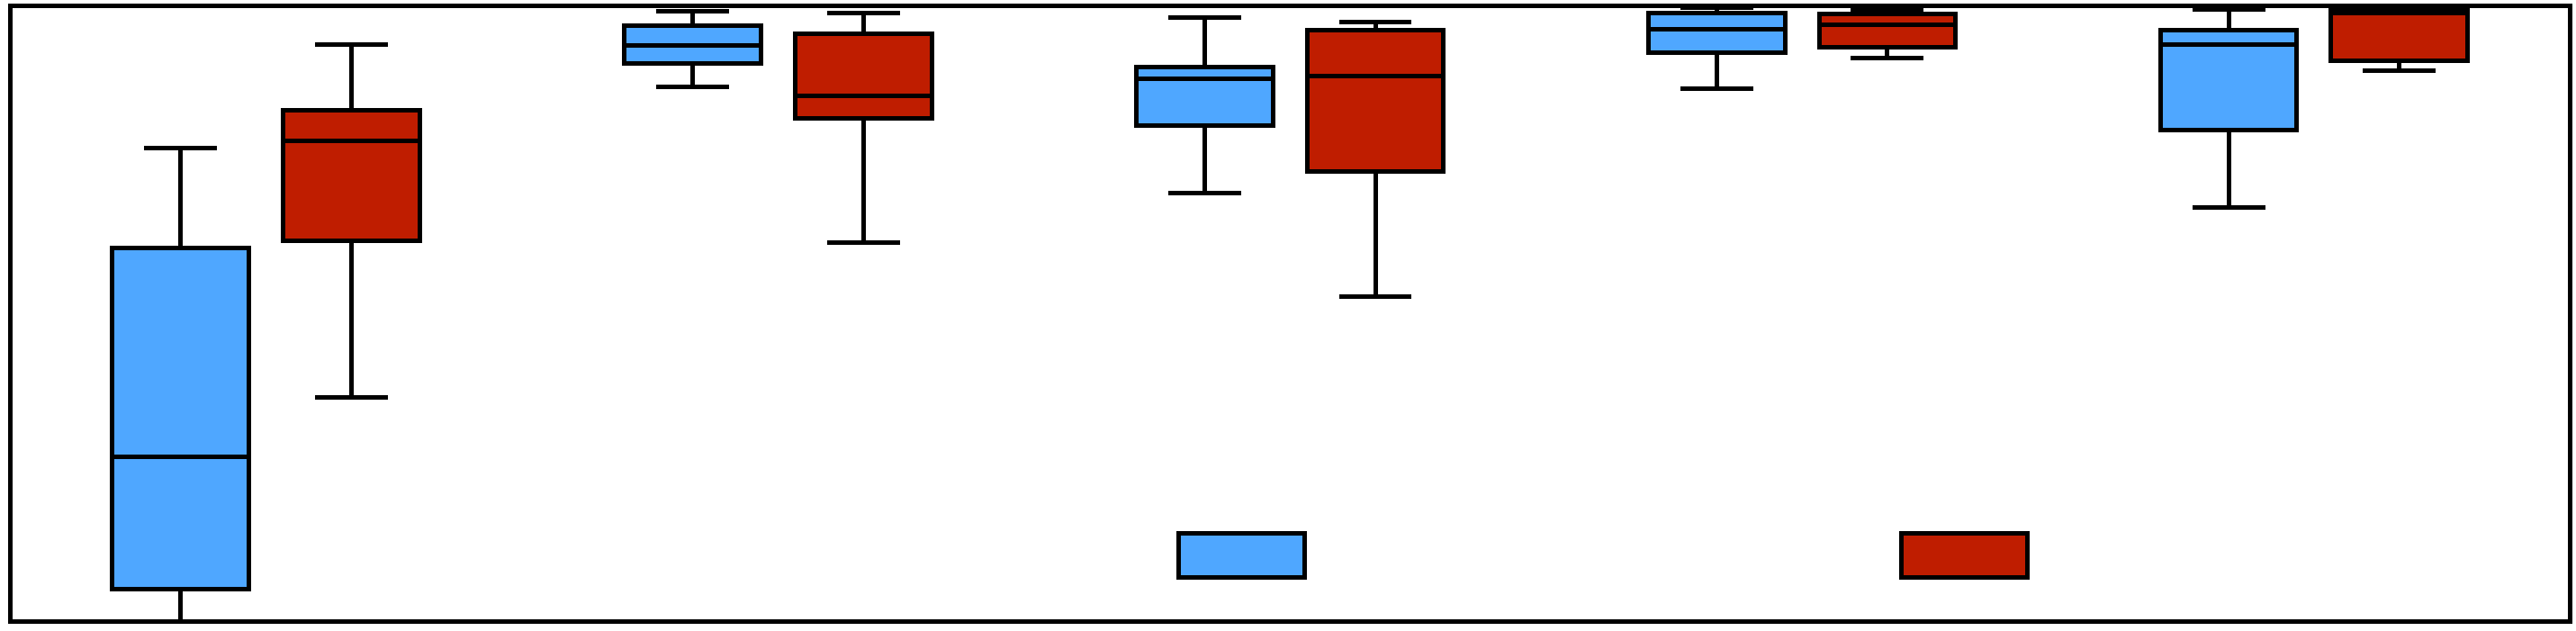

In [64]:
fig, ax = plt.subplots(figsize = [40,10])

plt.ylim (0, 1)
ax.spines["top"].set_linewidth(5)
ax.spines["left"].set_linewidth(5)
ax.spines["right"].set_linewidth(5)
ax.spines["bottom"].set_linewidth(5)

color1 = '#4FA7FF'
color2 = '#BF1D00'

def set_box_color (bp):
    plt.setp (bp['boxes'][0], color = 'black', facecolor = color1)
    plt.setp (bp['whiskers'][0], color = 'black')
    plt.setp (bp['whiskers'][1], color = 'black')
    plt.setp (bp['caps'][0], color = 'black')
    plt.setp (bp['caps'][1], color = 'black')
    plt.setp (bp['medians'][0], color = 'black')
    plt.setp (bp['medians'][0], color = 'black')
    
    plt.setp (bp['boxes'][1], color = 'black', facecolor = color2)
    plt.setp (bp['whiskers'][2], color = 'black')
    plt.setp (bp['whiskers'][3], color = 'black')
    plt.setp (bp['caps'][2], color = 'black')
    plt.setp (bp['caps'][3], color = 'black')
    plt.setp (bp['medians'][1], color = 'black')
    plt.setp (bp['medians'][1], color = 'black')

# Rectangular Box Plot with Data
boxprops = dict(linestyle='-', linewidth=5)
medianprops = dict(linestyle='-', linewidth=5)
meanprops = dict(linestyle='-', linewidth=5)
whiskerproprs = dict(linestyle='-', linewidth=5)

p16_bplot = ax.boxplot ([p16_FBS_pearsonr_values, p16_stemfit_pearsonr_values], boxprops = boxprops, medianprops=medianprops, meanprops = meanprops, vert = True, patch_artist = True, positions = [1,2],  widths = 0.8, showfliers=False, flierprops = {'marker': 'x'})
set_box_color (p16_bplot)

for whisker in p16_bplot['whiskers']: 
    whisker.set(linewidth = 5)

for caps in p16_bplot['caps']:
    caps.set(linewidth = 5)

SABG_bplot = ax.boxplot ([SABG_FBS_pearsonr_values, SABG_stemfit_pearsonr_values], boxprops = boxprops, medianprops=medianprops, meanprops = meanprops, vert = True, patch_artist = True, positions = [4,5],  widths = 0.8, showfliers=False, flierprops = {'marker': 'x'})
set_box_color (SABG_bplot)

for whisker in SABG_bplot['whiskers']: 
    whisker.set(linewidth = 5)

for caps in SABG_bplot['caps']:
    caps.set(linewidth = 5)

p38_bplot = ax.boxplot ([p38_FBS_pearsonr_values, p38_stemfit_pearsonr_values], boxprops = boxprops, medianprops=medianprops, meanprops = meanprops, vert = True, patch_artist = True, positions = [7,8],  widths = 0.8, showfliers=False, flierprops = {'marker': 'x'})
set_box_color (p38_bplot)

for whisker in p38_bplot['whiskers']: 
    whisker.set(linewidth = 5)

for caps in p38_bplot['caps']:
    caps.set(linewidth = 5)


cd105_bplot = ax.boxplot ([cd105_FBS_pearsonr_values, cd105_stemfit_pearsonr_values], boxprops = boxprops, medianprops=medianprops, meanprops = meanprops, vert = True, patch_artist = True, positions = [10,11],  widths = 0.8, showfliers=False, flierprops = {'marker': 'x'})
set_box_color (cd105_bplot)

for whisker in cd105_bplot['whiskers']: 
    whisker.set(linewidth = 5)

for caps in cd105_bplot['caps']:
    caps.set(linewidth = 5)

CCND2_bplot = ax.boxplot ([CCND2_FBS_pearsonr_values, CCND2_stemfit_pearsonr_values], boxprops = boxprops, medianprops=medianprops, meanprops = meanprops, vert = True, patch_artist = True, positions = [13,14],  widths = 0.8, showfliers=False, flierprops = {'marker': 'x'})
set_box_color (CCND2_bplot)

for whisker in CCND2_bplot['whiskers']: 
    whisker.set(linewidth = 5)

for caps in CCND2_bplot['caps']:
    caps.set(linewidth = 5)

# Organize Plot
plt.xlim (0, 15)
ax.set_xticks([1.5, 4.5, 7.5, 10.5, 13.5])
ax.set_xticklabels (['p16', 'SABG', 'CD105', 'CCND2', 'p38'])

# plt.title ("Single Cell Pearson Correlation Coefficient")
plt.ylabel ("r")

# plt.plot([], c = color1, label = 'FBS')
# plt.plot([], c = color2, label = 'Stemfit')
# plt.legend()

DMEM_label = mpatches.Patch(facecolor=color1, edgecolor = 'black', linewidth = 5, label = "                     ")
Stemfit_label = mpatches.Patch(facecolor=color2, edgecolor = 'black', linewidth = 5, label = "                       ")
plt.legend(handles=[DMEM_label, Stemfit_label], frameon=False, fontsize = 70, borderpad = 0, labelspacing = 0, handlelength = 2, ncol=2)


ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.tight_layout()
plt.savefig("MSC_Senescence_Pearson.png")

In [65]:
total_pearsonr_values = p16_FBS_pearsonr_values
total_pearsonr_values += p16_stemfit_pearsonr_values
total_pearsonr_values += SABG_FBS_pearsonr_values
total_pearsonr_values += SABG_stemfit_pearsonr_values
total_pearsonr_values += cd105_FBS_pearsonr_values
total_pearsonr_values += cd105_stemfit_pearsonr_values
total_pearsonr_values += CCND2_FBS_pearsonr_values
total_pearsonr_values += CCND2_stemfit_pearsonr_values
total_pearsonr_values += p38_FBS_pearsonr_values
total_pearsonr_values += p38_stemfit_pearsonr_values
print (np.mean(total_pearsonr_values))

0.7977014907344769
